<a href="https://colab.research.google.com/github/Ishaan75/MyProjects/blob/main/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [ ]:
### Data Collection
import pandas_datareader as pdr
# the key which I have downloaded from tiingo's api
key="5b3223fecc98daab6ddf09ef0d9001f378d0651e"

In [ ]:
# now i can get the Apple stock price data
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-07-19 00:00:00+00:00,99.87,100.00,99.340,99.56,23779924,23.320988,23.351345,23.197226,23.248599,95119696,0.0,1.0
1,AAPL,2016-07-20 00:00:00+00:00,99.96,100.46,99.735,100.00,26275968,23.342004,23.458761,23.289464,23.351345,105103872,0.0,1.0
2,AAPL,2016-07-21 00:00:00+00:00,99.43,101.00,99.130,99.83,32702028,23.218242,23.584858,23.148188,23.311648,130808112,0.0,1.0
3,AAPL,2016-07-22 00:00:00+00:00,98.66,99.30,98.310,99.26,28313669,23.038437,23.187885,22.956707,23.178545,113254676,0.0,1.0
4,AAPL,2016-07-25 00:00:00+00:00,97.34,98.84,96.920,98.25,40382921,22.730199,23.080469,22.632123,22.942696,161531684,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-07-12 00:00:00+00:00,144.50,146.32,144.00,146.21,76299719,144.50,146.32,144.00,146.21,76299719,0.0,1.0
1254,AAPL,2021-07-13 00:00:00+00:00,145.64,147.46,143.63,144.03,100827099,145.64,147.46,143.63,144.03,100827099,0.0,1.0
1255,AAPL,2021-07-14 00:00:00+00:00,149.15,149.57,147.68,148.10,127050785,149.15,149.57,147.68,148.10,127050785,0.0,1.0
1256,AAPL,2021-07-15 00:00:00+00:00,148.48,150.00,147.09,149.24,106820297,148.48,150.00,147.09,149.24,106820297,0.0,1.0
1257,AAPL,2021-07-16 00:00:00+00:00,146.39,149.76,145.88,148.46,93251426,146.39,149.76,145.88,148.46,93251426,0.0,1.0


In [ ]:
df1=df.reset_index()['close']

In [ ]:
df1

0        99.87
1        99.96
2        99.43
3        98.66
4        97.34
         ...  
1253    144.50
1254    145.64
1255    149.15
1256    148.48
1257    146.39
Name: close, Length: 1258, dtype: float64

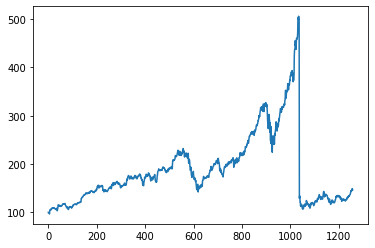

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [ ]:
import numpy as np

In [ ]:
df1

0        99.87
1        99.96
2        99.43
3        98.66
4        97.34
         ...  
1253    144.50
1254    145.64
1255    149.15
1256    148.48
1257    146.39
Name: close, Length: 1258, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.00781593]
 [0.00803576]
 [0.00674124]
 ...
 [0.12818133]
 [0.12654487]
 [0.12144009]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(817, 441)

In [ ]:
train_data

array([[0.00781593],
       [0.00803576],
       [0.00674124],
       [0.00486053],
       [0.00163646],
       [0.        ],
       [0.01533877],
       [0.01873382],
       [0.0184163 ],
       [0.02291046],
       [0.01907577],
       [0.02227541],
       [0.02247081],
       [0.0264032 ],
       [0.02857701],
       [0.0296517 ],
       [0.02767329],
       [0.02750232],
       [0.02811294],
       [0.03128816],
       [0.03104392],
       [0.03065312],
       [0.03031117],
       [0.03099507],
       [0.02891896],
       [0.0297494 ],
       [0.02774657],
       [0.02662303],
       [0.02508427],
       [0.02479117],
       [0.02278833],
       [0.02303258],
       [0.02457134],
       [0.02701382],
       [0.02694055],
       [0.02855259],
       [0.02161594],
       [0.01577842],
       [0.02142055],
       [0.02755117],
       [0.03688144],
       [0.04616286],
       [0.04457525],
       [0.04130233],
       [0.04127791],
       [0.04122906],
       [0.04384251],
       [0.039

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) # one lstm after the other
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1)) # output
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 287ms/step - loss: 0.0120 - val_loss: 0.0365
Epoch 2/100
12/12 [==============================] - 2s 189ms/step - loss: 0.0021 - val_loss: 0.0262
Epoch 3/100
12/12 [==============================] - 2s 185ms/step - loss: 0.0013 - val_loss: 0.0254
Epoch 4/100
12/12 [==============================] - 2s 182ms/step - loss: 7.6084e-04 - val_loss: 0.0207
Epoch 5/100
12/12 [==============================] - 2s 186ms/step - loss: 5.1342e-04 - val_loss: 0.0195
Epoch 6/100
12/12 [==============================] - 2s 187ms/step - loss: 4.4516e-04 - val_loss: 0.0197
Epoch 7/100
12/12 [==============================] - 2s 184ms/step - loss: 4.3639e-04 - val_loss: 0.0188
Epoch 8/100
12/12 [==============================] - 2s 183ms/step - loss: 4.0924e-04 - val_loss: 0.0187
Epoch 9/100
12/12 [==============================] - 2s 190ms/step - loss: 3.9313e-04 - val_loss: 0.0186
Epoch 10/100
12/12 [==============================] - 2s 182ms/step

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

175.39187468092592

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

226.2916168708799

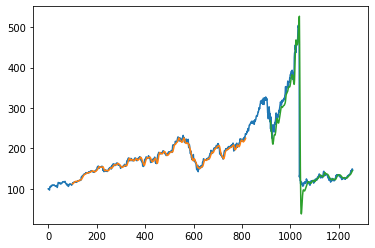

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

441

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.07005031507986909,
 0.05940110400078158,
 0.060060573494211345,
 0.07600996531678961,
 0.0694885447706512,
 0.06201455717844756,
 0.05730057154022761,
 0.060451370231058565,
 0.048092423428264364,
 0.05963313956328464,
 0.056934199599433355,
 0.061770309217917985,
 0.0594988031849934,
 0.06672854281666746,
 0.07058766059303401,
 0.06860925211274488,
 0.05827756338234574,
 0.05695862439548627,
 0.06526305505349028,
 0.06318694738898933,
 0.057202872356015844,
 0.0584241121586635,
 0.05993844951394656,
 0.060378095842899715,
 0.05673880123100972,
 0.06223438034292417,
 0.06431048800742512,
 0.07139367886278153,
 0.072150847540423,
 0.0762786380733721,
 0.08228713790239855,
 0.0887230716623516,
 0.08443651995505841,
 0.09222802989595041,
 0.08636607884324166,
 0.09239900346832103,
 0.09156856040252065,
 0.09322944653412146,
 0.0890039568169606,
 0.08995652386302572,
 0.0861462556787651,
 0.09195935713936787,
 0.092936348981486,
 0.09213033071173854,
 0.09015192223144941,
 0.08990767427

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.12160447]
101
1 day input [0.0594011  0.06006057 0.07600997 0.06948854 0.06201456 0.05730057
 0.06045137 0.04809242 0.05963314 0.0569342  0.06177031 0.0594988
 0.06672854 0.07058766 0.06860925 0.05827756 0.05695862 0.06526306
 0.06318695 0.05720287 0.05842411 0.05993845 0.0603781  0.0567388
 0.06223438 0.06431049 0.07139368 0.07215085 0.07627864 0.08228714
 0.08872307 0.08443652 0.09222803 0.08636608 0.092399   0.09156856
 0.09322945 0.08900396 0.08995652 0.08614626 0.09195936 0.09293635
 0.09213033 0.09015192 0.08990767 0.08497387 0.08761174 0.07615651
 0.07676713 0.0807728  0.08192077 0.07371403 0.0714181  0.06374872
 0.06912217 0.07517952 0.0722974  0.06882908 0.06843828 0.07483758
 0.07024571 0.07432465 0.07383616 0.07371403 0.06987934 0.06824288
 0.06743686 0.069342   0.06562943 0.07136925 0.07139368 0.07344536
 0.07439793 0.0719066  0.07493527 0.08258024 0.08052855 0.08177422
 0.08577988 0.08253139 0.08702555 0.09112891 0.09044502 0.0897367
 0.08900396 0.0930829  0.09686874 0.

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1258

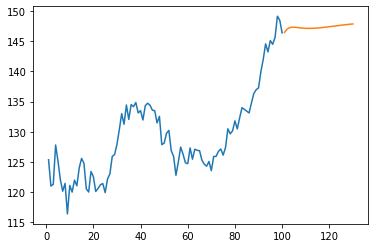

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

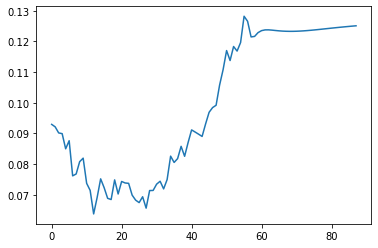

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

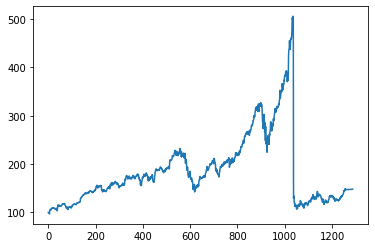

In [ ]:
plt.plot(df3)